In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column    

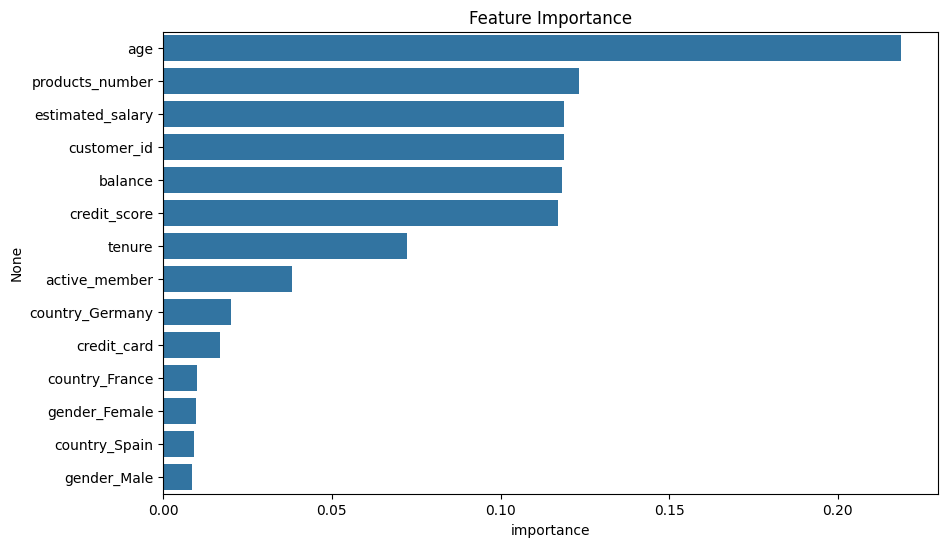

In [ ]:


# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset from Google Drive
file_path = '/content/drive/MyDrive/Bank Customer Churn Prediction.csv'
data = pd.read_csv(file_path)

# Explore the dataset
print(data.head())
print(data.info())
print(data.describe())

# Print the column names to verify the correct column names
print(data.columns)

# Check for missing values
print(data.isnull().sum())

# Fill or drop missing values as appropriate
# data = data.dropna()

# Encode categorical variables
data = pd.get_dummies(data)

# Print the columns after encoding to ensure the 'Churn' column is present
print(data.columns)

# Ensure the 'Churn' column exists before proceeding
if 'churn' in data.columns:
    # Split the data into features and target
    X = data.drop('churn', axis=1)
    y = data['churn']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Feature scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train a RandomForest Classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nAccuracy Score:")
    print(accuracy_score(y_test, y_pred))

    # Feature importance
    feature_importances = pd.DataFrame(model.feature_importances_,
                                       index = X.columns,
                                       columns=['importance']).sort_values('importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances.importance, y=feature_importances.index)
    plt.title('Feature Importance')
    plt.show()
else:
    print("Error: 'Churn' column not found in the dataset.")
